In [17]:
import pandas as pd 
import numpy as np
# from bokeh.plotting import figure 
# from bokeh.io import output_notebook,show, output_file
# from bokeh.models import ColumnDataSource, FactorRange
# from bokeh.transform import dodge, factor_cmap
# from bokeh.palettes import Spectral6

import seaborn as sns 
import matplotlib.pyplot as plt 

# from bokeh.core.properties import value

In [5]:
from nba_py.constants import CURRENT_SEASON
from nba_py import player
lebron_id = player.get_player("Lebron", "James")
print(lebron_id)
lebron_profile = player.PlayerProfile(player_id = lebron_id, per_mode = "PerGame")


## Career Highs 
# print(lebron_profile.career_highs())

1889    2544
Name: PERSON_ID, dtype: int64


In [6]:
lebron_last = player.PlayerLastNGamesSplits(player_id = lebron_id)

In [7]:
lbj_10 = lebron_last.last10()
print(lbj_10.columns)

Index(['GROUP_SET', 'GROUP_VALUE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD',
       'PTS', 'PLUS_MINUS', 'NBA_FANTASY_PTS', 'DD2', 'TD3', 'GP_RANK',
       'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK',
       'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK',
       'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK',
       'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK',
       'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK',
       'DD2_RANK', 'TD3_RANK', 'CFID', 'CFPARAMS'],
      dtype='object')


In [8]:
lbj_10[["GROUP_VALUE", "GP", "W", "L", "REB"]]

,GROUP_VALUE,GP,W,L,REB
0,2018-19,10,7,3,8.2


Shooting Splits 

In [9]:
## 2006-2007 Lebron Detailed Shooting Splits 
lbj_shoot07 = player.PlayerShootingSplits(player_id=lebron_id, per_mode="PerGame", season = "2006-07")
lbj_shot_types_detail_07 = lbj_shoot07.shot_types_detail()

## 2012-2013 Lebron Detailed Shooting Splits 
lbj_shoot13 = player.PlayerShootingSplits(player_id= lebron_id, per_mode="PerGame", season="2012-13")
lbj_shot_types_detail_13 = lbj_shoot13.shot_types_detail()


## 2017-2018 Lebron Detailed Shooting Splits 
lbj_shoot18 = player.PlayerShootingSplits(player_id=lebron_id, per_mode="PerGame", season = "2017-18")
lbj_shot_types_detail_18 = lbj_shoot18.shot_types_detail()

## filter out the FGA where it is only 0 or 1.
lbj_shot_types_detail_07 = lbj_shot_types_detail_07[lbj_shot_types_detail_07["FGA"] > 1]
lbj_shot_types_detail_13 = lbj_shot_types_detail_13[lbj_shot_types_detail_13["FGA"] > 1]
lbj_shot_types_detail_18 = lbj_shot_types_detail_18[lbj_shot_types_detail_18["FGA"] > 1]

# lbj_shot_summary_18 = lbj_shoot18.shot_types_summary()
# lbj_shot_summary_18

In [10]:
lbj_shot_types_detail_07

,GROUP_SET,GROUP_VALUE,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,EFG_PCT,BLKA,...,EFG_PCT_RANK,BLKA_RANK,PCT_AST_2PM_RANK,PCT_UAST_2PM_RANK,PCT_AST_3PM_RANK,PCT_UAST_3PM_RANK,PCT_AST_FGM_RANK,PCT_UAST_FGM_RANK,CFID,CFPARAMS
0,Shot Type Detail,Alley Oop Dunk Shot,16,17,0.941,0,0,0.000,0.941,0,...,7,1,1,21,2,4,1,21,50,Alley Oop Dunk Shot
1,Shot Type Detail,Alley Oop Layup shot,9,15,0.600,0,0,0.000,0.600,0,...,16,1,1,21,2,4,1,21,50,Alley Oop Layup shot
2,Shot Type Detail,Driving Dunk Shot,36,36,1.000,0,0,0.000,1.000,0,...,1,1,13,10,2,4,13,10,50,Driving Dunk Shot
3,Shot Type Detail,Driving Finger Roll Shot,14,17,0.824,0,0,0.000,0.824,0,...,11,1,17,6,2,4,17,7,50,Driving Finger Roll Shot
5,Shot Type Detail,Driving Layup Shot,133,160,0.831,0,0,0.000,0.831,5,...,10,26,16,9,2,4,16,9,50,Driving Layup Shot
6,Shot Type Detail,Dunk Shot,10,11,0.909,0,0,0.000,0.909,0,...,8,1,5,20,2,4,5,20,50,Dunk Shot
7,Shot Type Detail,Fadeaway Jump Shot,20,40,0.500,1,1,1.000,0.513,0,...,20,1,20,5,2,1,20,5,50,Fadeaway Jump Shot
8,Shot Type Detail,Finger Roll Shot,2,7,0.286,0,0,0.000,0.286,0,...,24,1,9,16,2,4,9,16,50,Finger Roll Shot
9,Shot Type Detail,Follow Up Dunk Shot,2,2,1.000,0,0,0.000,1.000,0,...,1,1,21,1,2,4,21,1,50,Follow Up Dunk Shot
11,Shot Type Detail,Hook Shot,1,3,0.333,0,0,0.000,0.333,0,...,23,1,1,21,2,4,1,21,50,Hook Shot


In [11]:
## Categorize what young players typically do vs. how older players change their game as they have lost much
## of their athleticism to be physical

young_moves = ["Driving", "Alley Oop", "Running"]

lbj_ym_07 = lbj_shot_types_detail_07[["GROUP_VALUE", "FGA"]]
lbj_ym_07 = lbj_ym_07[lbj_ym_07["GROUP_VALUE"].str.contains("|".join(young_moves))]
lbj_ym_07.sort_values(by = ["FGA"], inplace = True)

lbj_ym_13 = lbj_shot_types_detail_13[["GROUP_VALUE", "FGA"]]
lbj_ym_13 = lbj_ym_13[lbj_ym_13["GROUP_VALUE"].str.contains("|".join(young_moves))]
lbj_ym_13.sort_values(by = ["FGA"], inplace = True)

## Lebron 2017-18 shot types 
lbj_ym_18 = lbj_shot_types_detail_18[["GROUP_VALUE","FGA"]]
lbj_ym_18 = lbj_ym_18[lbj_ym_18["GROUP_VALUE"].str.contains("|".join(young_moves))]
lbj_ym_18.sort_values(by = ["FGA"], inplace = True)

In [12]:
lbj_ym_07

,GROUP_VALUE,FGA
20,Running Hook Shot,4
22,Running Layup Shot,6
1,Alley Oop Layup shot,15
0,Alley Oop Dunk Shot,17
3,Driving Finger Roll Shot,17
2,Driving Dunk Shot,36
21,Running Jump Shot,64
5,Driving Layup Shot,160


In [13]:
lbj_ym_13

,GROUP_VALUE,FGA
5,Driving Hook Shot,2
36,Running Reverse Layup Shot,2
37,Running Slam Dunk Shot,3
8,Driving Reverse Layup Shot,4
33,Running Hook Shot,6
31,Running Bank shot,8
9,Driving Slam Dunk Shot,9
1,Alley Oop Layup shot,10
32,Running Dunk Shot,10
35,Running Layup Shot,11


In [14]:
lbj_ym_18

,GROUP_VALUE,FGA
32,Running Jump Shot,3
36,Running Reverse Layup Shot,3
10,Driving Hook Shot,4
34,Running Pull-Up Jump Shot,4
31,Running Finger Roll Layup Shot,7
13,Driving Reverse Layup Shot,10
1,Alley Oop Layup shot,14
0,Alley Oop Dunk Shot,17
30,Running Dunk Shot,23
7,Driving Finger Roll Layup Shot,31


In [41]:
lbj_ym = pd.merge(lbj_ym_07, lbj_ym_13, on = ["GROUP_VALUE"], how="outer")
lbj_ym = pd.merge(lbj_ym, lbj_ym_18, on = ["GROUP_VALUE"], how = "outer")
lbj_ym.rename(columns = {"GROUP_VALUE": "Shot_Type","FGA_x": "2007", "FGA_y":"2013", "FGA":"2018"}, inplace = True)
lbj_ym = lbj_ym.apply(lambda x : x.fillna(0))
lbj_ym

,Shot_Type,2007,2013,2018
0,Running Hook Shot,4.0,6.0,0.0
1,Running Layup Shot,6.0,11.0,61.0
2,Alley Oop Layup shot,15.0,10.0,14.0
3,Alley Oop Dunk Shot,17.0,39.0,17.0
4,Driving Finger Roll Shot,17.0,0.0,0.0
5,Driving Dunk Shot,36.0,20.0,44.0
6,Running Jump Shot,64.0,24.0,3.0
7,Driving Layup Shot,160.0,146.0,253.0
8,Driving Hook Shot,0.0,2.0,4.0
9,Running Reverse Layup Shot,0.0,2.0,3.0


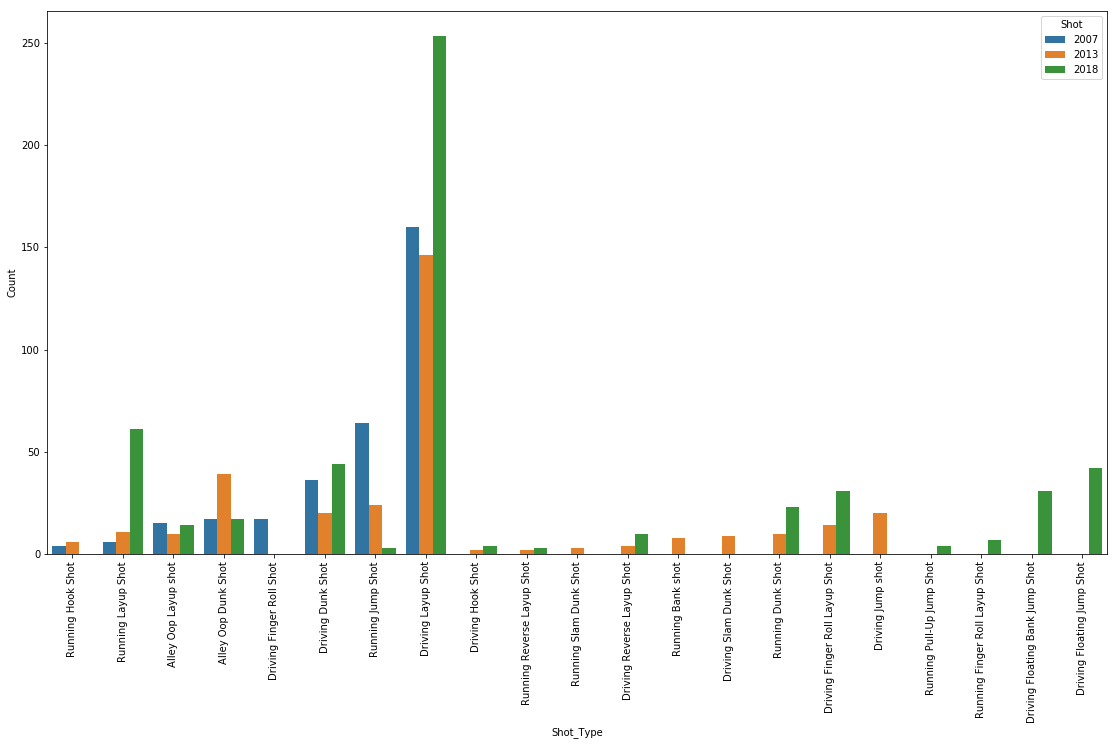

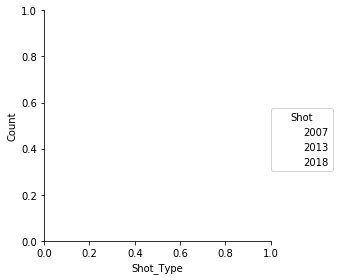

In [58]:
fig, ax = plt.subplots()
fig.set_size_inches(19,10)
plt.xticks(rotation = 90)

## melt the DF so can plot multiple barplots on the same figure 
df = pd.melt(lbj_ym, id_vars="Shot_Type", var_name = "Shot", value_name="Count")

## need to have ax = ax so can display the sns plot on top of the plt figure 
sns.factorplot(data= df, x = "Shot_Type", y = "Count", hue = "Shot", kind = "bar", ax=ax)


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
lbj_ym_18["FGA_Norm"] = scaler.fit_transform(lbj_ym_18[["FGA"]])
lbj_ym_18

f_norm = figure(x_range = lbj_ym_type)
f_norm.vbar(x = lbj_ym_type, top = lbj_ym_18["FGA_Norm"], width = 0.6)
f_norm.xaxis.major_label_orientation = "vertical"
output_notebook()
show(f_norm)

Loading BokehJS ...